Densify
=======

The purpose of this notebook is to show the usage of the `densify` method of the `TriangularMesh2D class`.

In the FEM, convergence to the actual solution of the Poisson equation is assured if the mesh is densified in a controlled way.  For the case at hand, involving a rectangular mesh tiled with right-angle triangular elements, it suffices to pick an element and add three nodes: these must coincide with the midpoints of each side of the triangular element.  Together with the previously existing nodes, the new nodes describe four new triangles that correspond to four elements of the densified mesh.  The procedure has to be carried out for each element of the initial mesh to obtain the whole densified mesh.

The implementation of such a procedure is rather trivial.  Each `TriangularMesh2D` object is instantiated using the `Nx` and `Ny` numbers of rectangular subdivisions spanning a row and a column respectively.  Densifying in the fashion explained above means simply doubling `Nx` and `Ny`, while keeping the dimensions of the mesh `Lx` and `Ly` constant.  This is exactly what the `densify` method does as implemented in the `Triangular2DMesh` class.

To see `densify` in action, we begin by defining an source term of the Poisson equation and a mesh:

In [1]:
import fem2d as fem
import numpy as np
from scipy.linalg import solve_banded

# define a 2D gaussian test function, source term of the Poisson equation
def gauss(p):
    sigma_x = 0.01
    sigma_y = 0.01
    x0      = 0.5
    y0      = 0.5
    N       = 1.0
    return N * np.exp(-((p[...,0]-x0)**2/(2.0*sigma_x) +
                        (p[...,1]-y0)**2/(2.0*sigma_y)))

# instantiate mesh
Nx = 2
Ny = 2
Lx = 1.0
Ly = 1.0
mesh = fem.TriangularMesh2D(Nx, Ny, Lx, Ly)

We can then solve the problem with increasingly dense meshes:

In [2]:
# instantiate lists to hold the solutions
x = []
y = []
f = []
u = []

# first mesh will actually have Nx, Ny = 4, 4
reps = 5
for i in range(reps):
    mesh.densify()
    nodes, nx, ny = mesh.nodes, mesh.nx, mesh.ny

    x.append(nodes[:,0].reshape(ny,nx))
    y.append(nodes[:,1].reshape(ny,nx))
    f.append(gauss(nodes).reshape(ny,nx))

    A_mat  = fem.stiffn(mesh)
    b_vec  = fem.fv_int(mesh, gauss)
    u.append(solve_banded((nx,nx), A_mat, b_vec).reshape(ny,nx))

Let us define a plotter function for our convenience:

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def plotter(X, Y, Z1, Z2):
    """Plotter function for the source term and the solution of the Poisson equation"""
    fig = plt.figure(figsize=(6.4, 3.0))
    fig.suptitle("Poisson equation", y= 0.95, fontsize=14)

    # first subplot: f(x, y), source term of the Poisson equation
    ax = fig.add_axes((0.0, 0.13, 0.5, 0.8), projection='3d')
    ax.set_title("source term", y=-0.15)
    ax.tick_params(labelsize=8, pad=-2)
    ax.set_xlabel('x', labelpad=-4)
    ax.set_ylabel('y', labelpad=-4)
    ax.text2D(0.90, 0.85, "f(x,y)", transform=ax.transAxes)
    ax.plot_wireframe(X, Y, Z1, linewidths=0.5)

    # second subplot: u, solution of the linear system
    ax = fig.add_axes((0.48, 0.13, 0.5, 0.8), projection='3d')
    ax.set_title("solution", y=-0.15)
    ax.tick_params(labelsize=8, pad=-2)
    ax.tick_params('z', pad=4)
    ax.set_xlabel('x', labelpad=-4)
    ax.set_ylabel('y', labelpad=-4)
    ax.text2D(0.90, 0.85, "u(x,y)", transform=ax.transAxes)
    ax.plot_wireframe(X, Y, Z2, linewidths=0.5)

    # plt.savefig("poisson.png")
    plt.show()

And let us conclude by plotting the results:

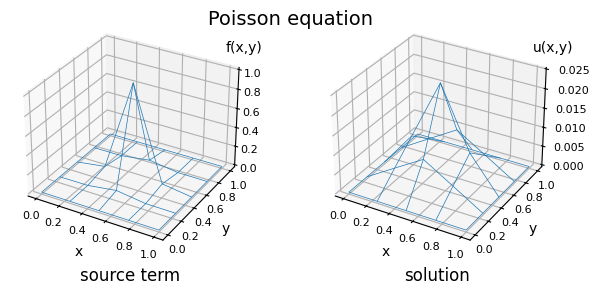

In [4]:
# 4x4 mesh
plotter(x[0], y[0], f[0], u[0])

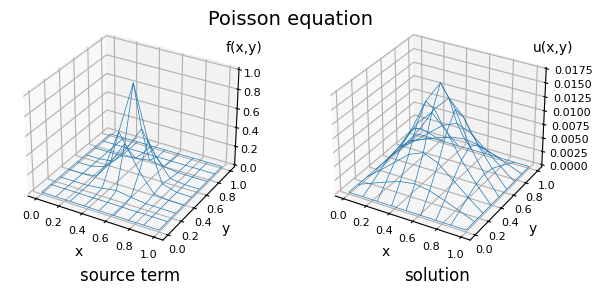

In [5]:
# 8x8 mesh
plotter(x[1], y[1], f[1], u[1])

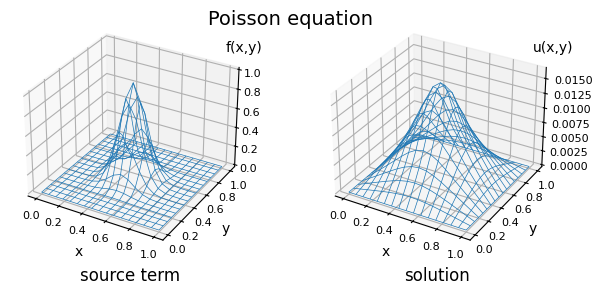

In [6]:
# 16x16 mesh
plotter(x[2], y[2], f[2], u[2])

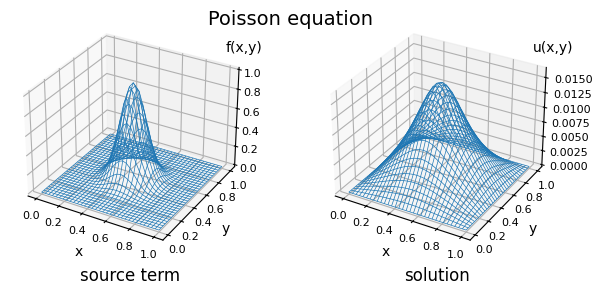

In [7]:
# 32x32 mesh
plotter(x[3], y[3], f[3], u[3])